<a href="https://colab.research.google.com/github/wilsonfffs/CODING-DOJO/blob/main/Desaf%C3%ADo_KNN_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import OrdinalEncoder

In [3]:
col_names=["Sex", "Length", "Diameter_continuous","Height","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Rings"]
df = pd.read_csv("/content/drive/MyDrive/Coding Dojo /Codigo /week5/abalone.data", names=col_names)
df

,Sex,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  4177 non-null   object 
 1   Length               4177 non-null   float64
 2   Diameter_continuous  4177 non-null   float64
 3   Height               4177 non-null   float64
 4   Whole_weight         4177 non-null   float64
 5   Shucked_weight       4177 non-null   float64
 6   Viscera_weight       4177 non-null   float64
 7   Shell_weight         4177 non-null   float64
 8   Rings                4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df = pd.DataFrame(df)
df

,Sex,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
df.isnull().sum()

Sex                    0
Length                 0
Diameter_continuous    0
Height                 0
Whole_weight           0
Shucked_weight         0
Viscera_weight         0
Shell_weight           0
Rings                  0
dtype: int64

In [7]:
df.shape

(4177, 9)

   Predicting the age of abalone from physical measurements.  The age of
   abalone is determined by cutting the shell through the cone, staining it,
   and counting the number of rings through a microscope
   Rings		integer			+1.5 gives the age in years

In [8]:
df['age'] = df['Rings']+1.5
df

,Sex,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [9]:
df_SEX = pd.get_dummies(df)
df_SEX

,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,1,0,0


In [10]:
df

,Sex,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [11]:
df_sin_SEX = df.drop("Sex", axis = 1)
df_sin_SEX

,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


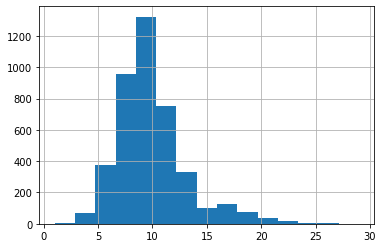

In [12]:
df_sin_SEX["Rings"].hist(bins=15)
plt.show() 

In [13]:
correlation_matrix = df_sin_SEX.corr()
correlation_matrix_rings = correlation_matrix["Rings"]
print(correlation_matrix_rings) 

Length                 0.556720
Diameter_continuous    0.574660
Height                 0.557467
Whole_weight           0.540390
Shucked_weight         0.420884
Viscera_weight         0.503819
Shell_weight           0.627574
Rings                  1.000000
age                    1.000000
Name: Rings, dtype: float64


In [20]:
X = df_sin_SEX.drop("Rings", axis=1)
X

,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [21]:
df_age_in = df_sin_SEX.loc[:,'age']
df_age_in

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: age, Length: 4177, dtype: float64

In [22]:
X = X.values
#X
y = df_sin_SEX["Rings"]
y = y.values
y

array([15,  7,  9, ...,  9, 10, 12])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
from sklearn.linear_model import LinearRegression

PRUEBA CON REGRECION LINEAL

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
reg = LinearRegression(fit_intercept=True)

In [58]:
reg.fit(X,y)

LinearRegression()

In [59]:
y_pred_L = reg.predict(X)
y_pred_L

array([15.,  7.,  9., ...,  9., 10., 12.])

In [60]:
score = reg.score(X, y)
print(score)

1.0


In [61]:
reg.fit(X_train,y_train)

LinearRegression()

In [68]:
X_train.shape

(3341, 8)

In [69]:
y_train.shape

(3341,)

In [70]:
X_test.shape

(836, 8)

In [71]:
y_test.shape

(836,)

In [104]:
y_pred_L_T = reg.predict(X_train)
y_pred_L_T

array([ 8.,  6., 14., ...,  7., 12., 10.])

In [63]:
score_T = reg.score(X_train, y_pred_L_T)
print(score_T)

1.0


In [64]:
reg.fit(X_test,y_test)

LinearRegression()

In [65]:
y_pred_L_Te = reg.predict(X_test)
y_pred_L_Te

array([21., 12., 12., 19., 11., 10.,  8.,  7., 10.,  7.,  9.,  8.,  9.,
        8.,  9.,  9., 11.,  8.,  9., 11.,  6., 18.,  9.,  8., 11.,  9.,
       10.,  7., 13., 10., 14.,  8.,  8., 16., 12.,  7.,  9., 14.,  6.,
        9.,  9.,  5.,  8., 11.,  8., 10.,  8.,  7.,  9., 10., 13., 20.,
        8., 17., 11., 11., 11.,  8.,  9.,  6.,  6.,  8., 16., 10., 12.,
       10.,  9.,  9., 10., 12., 11., 11., 10., 14., 10.,  9., 10.,  9.,
       11., 11.,  7.,  6.,  5.,  9., 10., 18.,  9., 10., 12., 11., 17.,
        9., 10., 18., 16., 12.,  6., 10.,  7.,  6., 10.,  8., 10., 11.,
        6., 10.,  8.,  6.,  7., 15., 10.,  8., 11., 12., 11.,  8.,  9.,
       10., 10.,  9.,  8., 18.,  9., 11.,  9., 10., 17.,  8.,  7.,  6.,
        9.,  8.,  9., 10.,  8., 10., 10.,  9.,  9.,  9.,  9.,  9., 10.,
       12., 10., 20.,  8., 10., 10., 11., 11., 11., 11., 13., 15., 10.,
        7., 15.,  9.,  8.,  4., 11.,  9., 14., 11., 21.,  7., 11., 13.,
        7.,  9.,  9., 13., 16.,  8., 10.,  8.,  7.,  7., 10., 10

In [66]:
score_Te = reg.score(X_test, y_pred_L_Te)
print(score_Te)

1.0


In [105]:
knn_model = KNeighborsRegressor(n_neighbors = 3) 

In [106]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [107]:
preds = knn_model.predict(X_train)


In [108]:
score_knn = knn_model.score(X_train, y_train)
print(score_knn)

0.9925079986952586


In [109]:
print(preds)


[ 8.          6.         14.         ...  7.         12.33333333
 10.        ]


In [110]:
rings_pre_knn = pd.DataFrame(preds)
rings_pre_knn

,0
0,8.000000
1,6.000000
2,14.000000
3,7.000000
4,8.000000
...,...
3336,10.666667
3337,15.666667
3338,7.000000
3339,12.333333


In [111]:
rings_pre_knn['age_knn_P'] = rings_pre_knn[0]+1.5
rings_pre_knn

,0,age_knn_P
0,8.000000,9.500000
1,6.000000,7.500000
2,14.000000,15.500000
3,7.000000,8.500000
4,8.000000,9.500000
...,...,...
3336,10.666667,12.166667
3337,15.666667,17.166667
3338,7.000000,8.500000
3339,12.333333,13.833333


In [112]:
rings_pre_knn['Age_Info_INI'] = df_age_in
rings_pre_knn.head(20)

,0,age_knn_P,Age_Info_INI
0,8.000000,9.500000,16.5
1,6.000000,7.500000,8.5
2,14.000000,15.500000,10.5
3,7.000000,8.500000,11.5
4,8.000000,9.500000,8.5
5,9.666667,11.166667,9.5
6,3.000000,4.500000,21.5
7,9.666667,11.166667,17.5
8,11.000000,12.500000,10.5
9,7.000000,8.500000,20.5


In [113]:
Age_prediction = rings_pre_knn.rename(columns={0:'Rings_Predi'})
Age_prediction

,Rings_Predi,age_knn_P,Age_Info_INI
0,8.000000,9.500000,16.5
1,6.000000,7.500000,8.5
2,14.000000,15.500000,10.5
3,7.000000,8.500000,11.5
4,8.000000,9.500000,8.5
...,...,...,...
3336,10.666667,12.166667,12.5
3337,15.666667,17.166667,16.5
3338,7.000000,8.500000,17.5
3339,12.333333,13.833333,13.5


In [117]:
Age_prediction['age_Regression_P'] = y_pred_L_T + 1.5
Age_prediction.head(20)

,Rings_Predi,age_knn_P,Age_Info_INI,age_Regression_P
0,8.000000,9.500000,16.5,9.5
1,6.000000,7.500000,8.5,7.5
2,14.000000,15.500000,10.5,15.5
3,7.000000,8.500000,11.5,8.5
4,8.000000,9.500000,8.5,9.5
5,9.666667,11.166667,9.5,11.5
6,3.000000,4.500000,21.5,4.5
7,9.666667,11.166667,17.5,11.5
8,11.000000,12.500000,10.5,12.5
9,7.000000,8.500000,20.5,8.5
